In [ ]:
# Author: Lee Yat Shun, Jasper
# Copyright (c) 2023 Lee Yat Shun, Jasper. All rights reserved.

In [16]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from caviar import CaviarModel

In [17]:
df = pd.read_excel('../data/SPY.xlsx')
df.columns = df.iloc[5].values
df = df.iloc[6:].iloc[::-1].reset_index(drop=True)
df['Log Return'] = df.PX_LAST.apply(lambda x: np.log(x)).diff()
df.head()

,Date,PX_LAST,Change,% Change,PX_OPEN,Change,% Change,PX_HIGH,Change,% Change,PX_LOW,Change,% Change,Log Return
0,1993-01-29 00:00:00,25.2238,NaN,NaN,25.2417,NaN,NaN,25.2417,NaN,NaN,25.1161,NaN,NaN,NaN
1,1993-02-01 00:00:00,25.4032,NaN,NaN,25.2417,NaN,NaN,25.4032,NaN,NaN,25.2417,NaN,NaN,0.007087
2,1993-02-02 00:00:00,25.457,NaN,NaN,25.3852,NaN,NaN,25.4749,NaN,NaN,25.3314,NaN,NaN,0.002116
3,1993-02-03 00:00:00,25.7261,NaN,NaN,25.4929,NaN,NaN,25.744,NaN,NaN,25.4749,NaN,NaN,0.010515
4,1993-02-04 00:00:00,25.8337,NaN,NaN,25.8158,NaN,NaN,25.8876,NaN,NaN,25.762,NaN,NaN,0.004174


In [18]:
returns = (df['Log Return'].dropna() - df['Log Return'].dropna().mean()).reset_index(drop=True)

## MLE

In [19]:
# initiate parameter
quantile = 0.05 # 5% VAR

In [51]:
# fitting process
caviar_model = CaviarModel(quantile, model='symmetric', method='mle')
caviar_model.fit(returns)

      fun: -8157.715126396648
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-10.67564882,  24.83338903,  23.48015175,   4.72564352])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 500
      nit: 38
     njev: 100
   status: 0
  success: True
        x: array([ 0.12491816, -0.0407822 ,  0.87650955, -0.23030957])
Final loss: 943.8791546190191
Time taken(s): 8.19


In [52]:
# result
beta = caviar_model.beta
vars = caviar_model.caviar(returns*100, beta, quantile)

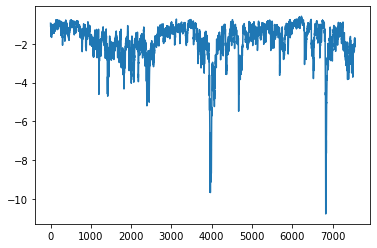

In [53]:
plt.plot(vars)

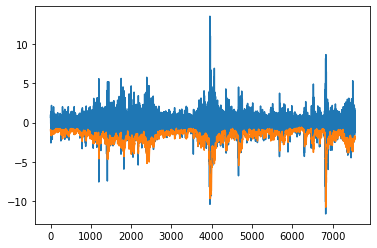

In [54]:
plt.plot(returns*100)
plt.plot(vars)

In [55]:
print("No. samples out of VAR (normalized):", sum(np.where(returns*100 <= vars, 1, 0))/returns.shape[0])

No. samples out of VAR (normalized): 0.0500330906684315


### Numeric

In [32]:
# initiate parameter
quantile = 0.05 # 5% VAR

In [45]:
# fitting process
caviar_model = CaviarModel(quantile, model='symmetric', method='numeric')
caviar_model.fit(returns)

Generating 10 best initial betas out of 1000...
Optimizing by simplex method and quasi-newton method...
when m = 1
Update 0: 3270.8773536106783
Update 1: 943.8791727216365
Update 2: 943.8791727216365
Final loss: 943.8791727216365
Time taken(s): 8.87


D:\CAViaR-Project\test\..\caviar\_caviar_function.py:47: RuntimeWarning: overflow encountered in double_scalars
  sigmas[t] = b1 + b2 * sigmas[t - 1] + b3 * abs(returns[t - 1])
C:\Users\Jasper\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
D:\CAViaR-Project\test\..\caviar\_caviar_function.py:47: RuntimeWarning: overflow encountered in double_scalars
  sigmas[t] = b1 + b2 * sigmas[t - 1] + b3 * abs(returns[t - 1])


In [46]:
beta

array([0.05358607, 0.86069596, 0.37677203])

In [47]:
# result
beta = caviar_model.beta
vars = caviar_model.caviar(returns*100, beta, quantile)

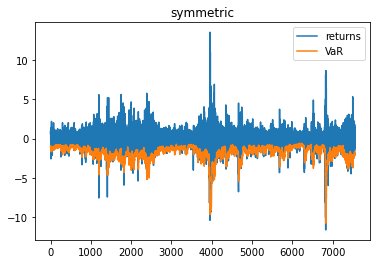

In [62]:
plt.title(caviar_model.model)
plt.plot(returns*100, label='returns')
plt.plot(vars, label='VaR')
plt.legend()

In [50]:
print("No. samples out of VAR (normalized):", sum(np.where(returns*100 <= vars, 1, 0))/returns.shape[0])

No. samples out of VAR (normalized): 0.0500330906684315
